# Notebook for Topic 2 - Models

In this Notebook, I will compare fitting a data set to a straight line using three different methods:
* minimizing the explicitly defined cost function using the `minimize` function from `scipy.optimize`
* using `polyfit` from `NumPy` 
* using `curve_fit` from `SciPy`

<hr style="border-top: 1px solid #001a79;" />

## Exercise 1

*Use numpy and matplotlib to plot the absolute value function.*

*Research and explain why the absolute value function is not typically used in fitting straight lines to data.*

In [1]:
# Import all used libraries

# Numpy for numerical arrays
import numpy as np

# matplotlib for plots
import matplotlib.pyplot as plt

# Optimization
import scipy.optimize as so

The absolute value function is a mathematical function that returns the absolute value of a number, which is the number's distance from zero on the number line. The absolute value function is defined as follows:

$$f(x) = |x| = \begin{cases}
x & \text{if } x \ge 0 \\
-x & \text{if } x < 0
\end{cases}$$




#### Plot absolute value function

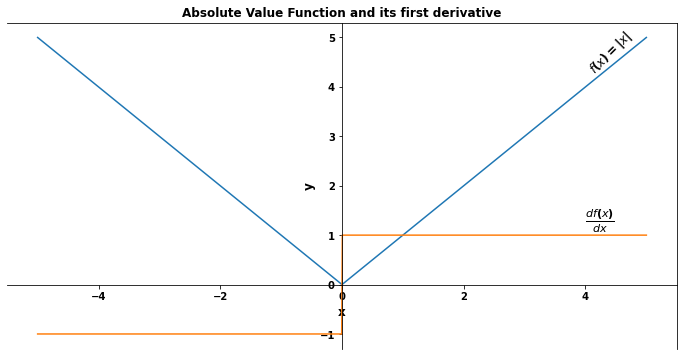

In [2]:
# Create a plot to visualize Data Set 1 with 2nd degree polynomial fit 
fig, ax = plt.subplots(figsize=(12,6))

# create x values for plot
x = np.linspace(-10, 10, 100)

# Add title
plt.title('Absolute Value Function and its first derivative')

# Define the function
def f(x):
    return np.abs(x)

# Define the derivative of the function
def f_prime(x):
    return np.sign(x)

# Create a range of x values
x = np.linspace(-5, 5, 1000)

# Calculate the y values for the function and its derivative
y = f(x)
y_prime = f_prime(x)

ax.plot(x, y, label='f(x)')
ax.plot(x, y_prime, label='f\'(x)')


# X and Y axis default position moved as per https://stackoverflow.com/questions/25689238/show-origin-axis-x-y-in-matplotlib-plot
# set the x-spine
ax.spines['left'].set_position('zero')

# set the y-spine
ax.spines['bottom'].set_position('zero')

# Add labels and legend
ax.set_xlabel('x')
ax.set_ylabel('f(x)')


# Set the X axis label
plt.xlabel('x', fontsize=12)
# Set the Y axis label
plt.ylabel('y', fontsize=12)


# Add a description of the abs function
plt.text(4, 4.3, r'$f(x) = |x|$', rotation=45, fontsize=12)

plt.text(4, 1.2, r'$\frac{df(x)}{dx} $', fontsize=16)

# Show the plot
plt.show()


#### Why absolute value function is not typically used in fitting straight lines to data

The absolute value function, denoted as |x|, is not differentiable at the point x=0. This is because the derivative of the function, which represents the slope of the function at a given point, is not well-defined at x=0. This is due to the discontinuity in the first derivative of the absolute value function at x=0, where the cost is 0. As a result, optimization algorithms that utilize the gradient, or the derivative of the cost function, may encounter difficulties when attempting to compute update steps for model parameters using the absolute value function [2].

In addition, the absolute value function is not a smooth function, which means that it has sharp corners and is not continuous. This can make it more difficult to optimize, especially when using algorithms that rely on smoothness or continuity (such as gradient descent).

Overall, the absolute value function is not well-suited for use as a cost function in regression models because it is not differentiable and is not smooth. Other cost functions, such as the mean squared error (MSE) or mean absolute error (MAE), are typically used instead because they are differentiable and smooth, which makes them easier to optimize [1].

<hr style="border-top: 1px solid #001a79;" />

## Exercise 2

*Fit a straight line to the following data points, using all three methods used above.*

*Do you think a straight line is a good model for these points?*

In [3]:
# Define sample data set as a NumPy arrays
x = np.array([2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0])
y = np.array([0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1])

#### Visualise the points on the scatter plot

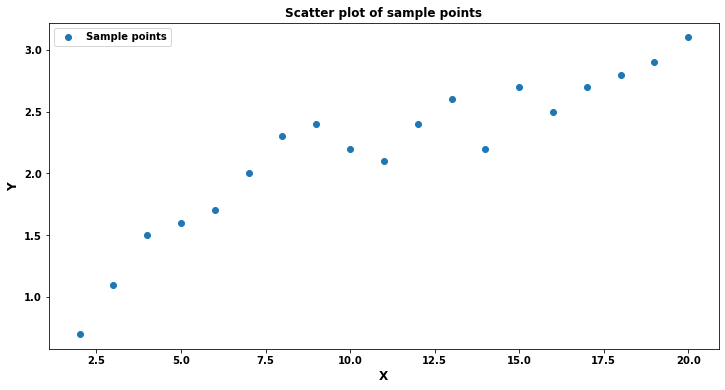

In [4]:
# Create a scatter plot to visualize the sample data
fig, ax = plt.subplots(figsize=(12,6))

plt.title("Scatter plot of sample points")

# Set the X axis label
plt.xlabel('X', fontsize=12)
# Set the Y axis label
plt.ylabel('Y', fontsize=12)


# Plot Data Set 1 points:
ax.scatter(x, y, label="Sample points");

plt.legend();

## Use minimize function from SciPy Optimize package

#### Define the cost function MSE (Mean Square Error) and MAE (Mean Absolute Error)

In [5]:
# MSE (Mean Square Error)
def mse(params):
    # unpack the parameters
    a, b = params
    # calculate the Mean Square Erorr cost
    cost = np.sum( (y - a*x- b)**2 )
    # return the cost
    return cost

#  MAE (Mean Absolute Error)
def mae(params):
    # unpack the parameters
    a, b = params
    # calculate the Mean Absolute Erorr cost
    cost = np.sum( np.abs(y - a*x- b) )
    # return the cost
    return cost

In [6]:
# test the cost functions

print(mse((1/7, .2)))
print(mae((1/7, .2)))

5.17530612244898
7.8714285714285745


#### Run minimize function on a 'Mean Square Error' cost function [3]

In [7]:
# Use minimize function from scipy.optimize package
# Cost function: mse (Mean Square Error)
# Initial guess for line parameters: a=1/7, b=0.2

result_mse = so.minimize(mse, (1/7, .2))
a_mse, b_mse = result_mse.x

print("Parameters calculated using Mean Square Error as a cost function: a={:.4}, b={:.4}".format(a_mse, b_mse))
print(result_mse)

Parameters calculated using Mean Square Error as a cost function: a=0.1032, b=1.049
      fun: 1.0395789473691308
 hess_inv: array([[ 0.00087719, -0.00964912],
       [-0.00964912,  0.13245614]])
      jac: array([2.98023224e-08, 5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([0.10315786, 1.04947407])


#### Run minimize function on a 'Mean Absolute Error' cost function

In [8]:
# Use minimize function from scipy.optimize package
# Cost function: mae (Mean Absolute Error)
# Initial guess for line parameters: a=1/7, b=0.2

result_mae = so.minimize(mae, (1/7, .2))
a_mae, b_mae = result_mae.x

print("Parameters calculated using Mean Absolute Error as a cost function: a={:.4}, b={:.4}\n".format(a_mae, b_mae))
print(result_mae)

Parameters calculated using Mean Absolute Error as a cost function: a=0.09308, b=1.135

      fun: 3.272327653588931
 hess_inv: array([[ 3.49193726e-05, -7.04126535e-05],
       [-7.04126535e-05,  1.04546621e-03]])
      jac: array([8.58964992, 0.58964992])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 222
      nit: 9
     njev: 70
   status: 2
  success: False
        x: array([0.09308191, 1.13459043])


The main differences in results of optimizing the MSE and MAE cost functions are as follows:
* the value of the fun attribute. In `result_mse`, fun parameter is equal to 1.04, while in `result_mae`, fun is equal to 3.27. This indicates that the MSE objective function was able to find a set of parameters that resulted in a lower cost than the MAE objective function.
* The `nfev`, `nit`, and `njev` attributes represent the number of evaluations of the objective function, the number of iterations performed by the optimization algorithm, and the number of evaluations of the Jacobian, respectively. All this numbers are much larger when MAE cost function was used, suggesting that it took more iterations of the algorithm to come up with a solution.
* Success message: 'minimize' managed to successfully find the minimum when MSE function was used but failed to do it when MAE was used. 

All above seems to be proving that using the Mean Square Error (MSE) as the cost function instead of the Mean Absolute Error (MAE) resulted in better performance for our optimization problem.

The MSE is defined as the average squared difference between the predicted and true values, and it is a common measure of error in regression problems. It is typically used when the goal is to fit a model that is as close as possible to the true values, rather than just minimizing the absolute differences between the predicted and true values.

Using the MSE as the objective function can be helpful in situations where the data has a strong linear trend, as it will tend to penalize large errors more heavily than the MAE. This can make the optimization algorithm more sensitive to changes in the parameters, which can result in better model fits for data with strong linear trends. However, using the MSE as the objective function can also make the optimization algorithm more sensitive to outliers or noise in the data, which can lead to overfitting or poor generalization to new data [2].

#### Plot sample points and line fitted using MAE and MSE

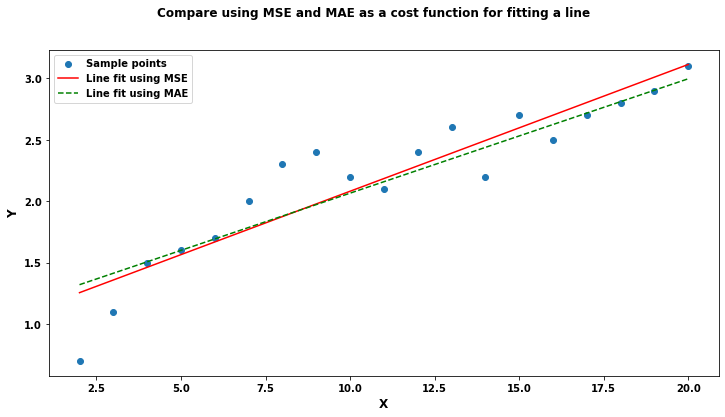

In [9]:
# Compare the scatter plot of a the sample data with 2 fitted lines
fig, ax = plt.subplots(figsize=(12,6))

fig.suptitle("Compare using MSE and MAE as a cost function for fitting a line")

# Set the X axis label
plt.xlabel('X', fontsize=12)
# Set the Y axis label
plt.ylabel('Y', fontsize=12)


# Plot Data Set 1 points:
ax.scatter(x, y, label="Sample points");

ax.plot(x, a_mse*x+b_mse, "r-", label="Line fit using MSE")
ax.plot(x, a_mae*x+b_mae, "g--", label="Line fit using MAE")


ax.legend();

## Use Polyfit from NumPy package [4]

NumPy's polyfit function fits a polynomial of a specified degree to a given set of data points. It returns the coefficients of the polynomial that best approximates the data in a least-squares sense. The polynomial can then be evaluated at specific points or plotted over a range of values to visualize the fit.

In [10]:
# deg - degree of the fitting polynomial
# deg=1 - linear function, =2 - quadratic function etc
deg = 1

# calculate a and b parameters using np.polyfit
a, b = np.polyfit(x, y, deg)

print("Parameters calculated using Numpy Polyfit: a={:.4}, b={:.4}\n".format(a, b))

Parameters calculated using Numpy Polyfit: a=0.1032, b=1.049



Line parameters a and b calculated using Numpy Polyfit are very close to the parameters calculated using `SciPy.Optimize.minimize` function with MSE used as a cost function. This is not supprising, as Polyfit also performs a least-squares polynomial fit on the given data [4].

#### Plot sample points and line fitted using Polyfit function form NumPy

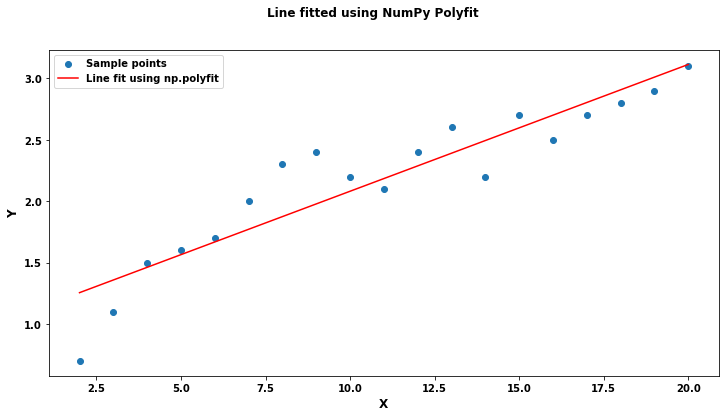

In [11]:
# Compare the scatter plot of a the sample data with 2 fitted lines
fig, ax = plt.subplots(figsize=(12,6))

fig.suptitle("Line fitted using NumPy Polyfit")

# Set the X axis label
plt.xlabel('X', fontsize=12)
# Set the Y axis label
plt.ylabel('Y', fontsize=12)


# Plot Data Set 1 points:
ax.scatter(x, y, label="Sample points");

ax.plot(x, a*x+b, "r-", label="Line fit using np.polyfit")

ax.legend();

## Use SciPy curve_fit

`Scipy.optimize.curve_fit` is used to fit a function to a set of data points by finding the optimal parameters for the function that minimize the difference between the predicted values and the actual data. It uses the Levenberg-Marquardt algorithm to optimize the parameters, which combines the fast convergence of gradient descent with the robustness of the Newton-Raphson method. This function is useful for finding the underlying mathematical relationship between variables in a dataset and for making predictions based on that relationship [5] [6].

One of the parameters for `curve_fit` is a user-defined function that describes the model that needs to be fited to the data. In our example, we'll use the linear function, so we'll need to define it first.

In [12]:
# define the linear function
# The model function, f(x, …). It must take the independent variable as the first argument and the parameters to fit as separate remaining arguments [5]

def lin_fun(x, a, b):
    return a*x+b

In [13]:
# Use the curve_fit from SciPy.Optimize package to fit the point to a line
params = so.curve_fit(lin_fun, x, y)

# get the a and b parameters
a_cf, b_cf = params[0]

# print the results
print("Parameters calculated using SciPy.curve_fit: a={:.4}, b={:.4}\n".format(a_cf, b_cf))

Parameters calculated using SciPy.curve_fit: a=0.1032, b=1.049



#### Plot sample points and line fitted using SciPy.curve_fit

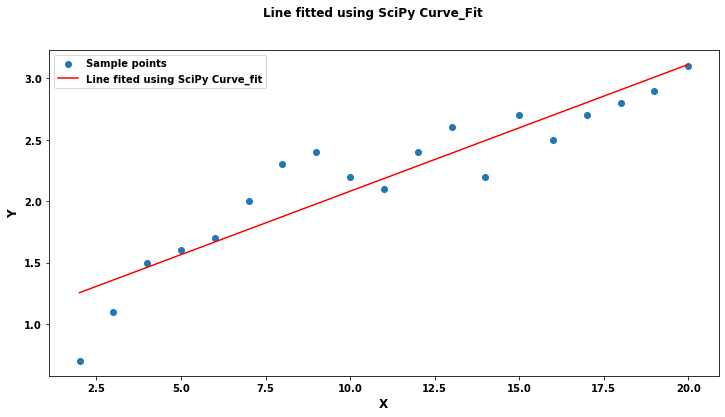

In [14]:
# Compare the scatter plot of a the sample data with 2 fitted lines
fig, ax = plt.subplots(figsize=(12,6))

fig.suptitle("Line fitted using SciPy Curve_Fit")

# Set the X axis label
plt.xlabel('X', fontsize=12)
# Set the Y axis label
plt.ylabel('Y', fontsize=12)

# Use the definition of a linear function to calculate the y values
y_lin = lin_fun(x, a_cf, b_cf)

# Plot Data Set 1 points:
ax.scatter(x, y, label="Sample points");

# plot the fitted line
ax.plot(x, y_lin, "r-", label="Line fited using SciPy Curve_fit")

ax.legend();

## Summary [7][8]

**1. Minimize function from SciPy.Optimize:**

Pros:
* Allows for use of custom loss function, which can be useful if the model that is being fitting is not well-suited to the use of mean squared error.
* Can use more advanced optimization algorithms, such as the Levenberg-Marquardt algorithm, which can be more efficient than methods like gradient descent.

Cons:
* Requires more knowledge and effort to implement, as a loss function need to be devfined and appropriate optimization algorithm need to be selected.

**2. Polyfit from NumPy:**

Pros:
* Simple to use, just requires passing the x and y data and the degree of the polynomial to fit.
* Fast and efficient, as it uses an efficient implementation of the least squares algorithm to fit the data.

Cons:
* Only works for fitting data to polynomial models, so it is not as flexible as the minimize function.

**3. Curve_fit from SciPy:**

Pros:
* Allows for fitting data to any function that can be expressed as a mathematical formula, not just polynomials.
* Can use more advanced optimization algorithms, such as the Levenberg-Marquardt algorithm, which can be more efficient than methods like gradient descent.

Cons:
* Requires more knowledge and effort to implement, as you need to define the function to fit and specify any necessary parameters.
* May be slower than the polyfit function, as it uses a more general optimization algorithm.

# External references

[[1] Gradient Descent Algorithm — a deep dive](https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21)<br>
[[2] The world of cost functions — inclusivity, majoritarianism and oligarchy](https://towardsdatascience.com/the-world-of-cost-functions-inclusivity-majoritarianism-and-oligarchy-51362b8b91f4)<br>
[[3] SciPy.optimize Minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize)<br>
[[4] Numpy polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)<br>
[[5] SciPy.optimize Curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)<br>
[[6] Levenberg–Marquardt algorithm](https://en.wikipedia.org/wiki/Levenberg%E2%80%93Marquardt_algorithm)<br>
[[7] Mathematical optimization: finding minima of functions](https://scipy-lectures.org/advanced/mathematical_optimization/)<br>
[[8] Curve Fitting: Linear, Cubic, Polynomial (1-5), Piecewise, Goodness of Fit and Regression Analysis In Python](https://skill-lync.com/student-projects/Curve-FItting-In-Python-Assignment-89826)

___
# End